In [ ]:
# COVID-19 Data Analysis

This notebook analyses country-wise COVID-19 data using Python libraries:
- pandas
- matplotlib
- seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
data=pd.read_csv("covid19data.csv")
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


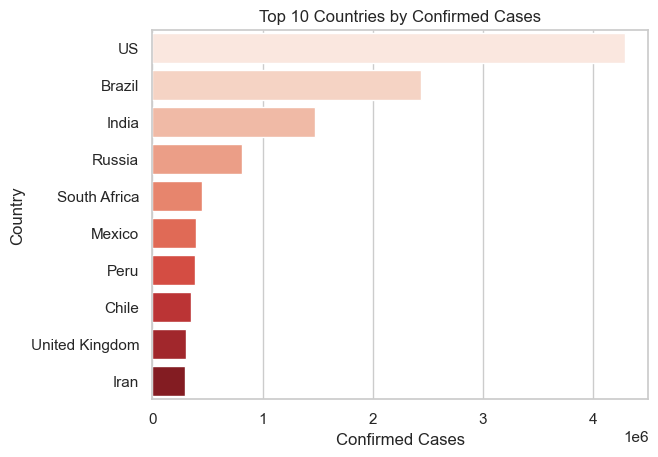

In [6]:
## Top 10 Countries by Confirmed Cases
top10=data.sort_values("Confirmed",ascending=False).head(10)
sns.barplot(x='Confirmed',y='Country/Region',hue='Country/Region',data=top10, palette="Reds", legend=False)
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()

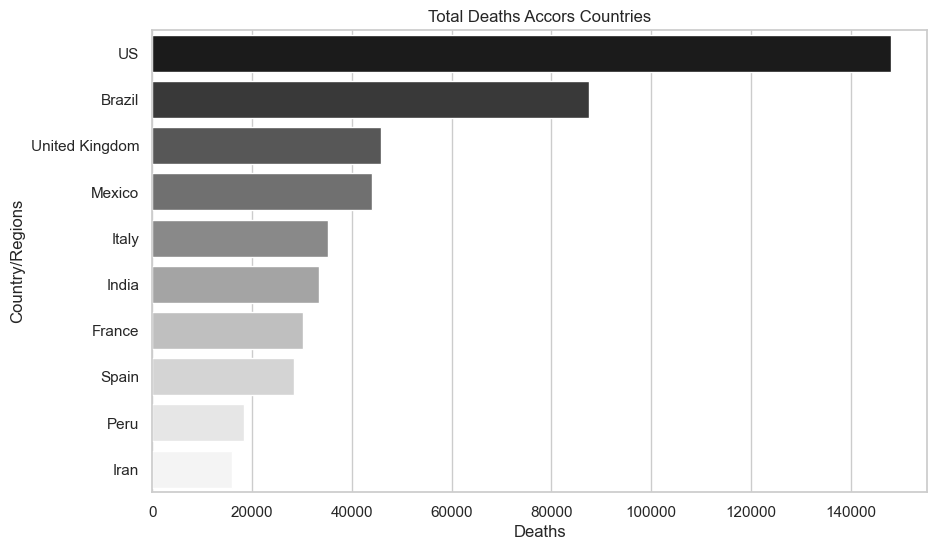

In [7]:
## Top 10 Countries by Deaths.
Top10deaths=data.sort_values("Deaths",ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Deaths',y='Country/Region',hue='Country/Region',data=Top10deaths,palette='Greys_r')
plt.title('Total Deaths Accors Countries')
plt.xlabel('Deaths')
plt.ylabel('Country/Regions')
plt.show()

In [8]:
## Top 10 countries by mortality rate and recovery rate.
data["Mortality Rate (%)"] = (data["Deaths"] / data["Confirmed"]) * 100
data["Recovery Rate (%)"] = (data["Recovered"] / data["Confirmed"]) * 100

data_rates = data[["Country/Region","Mortality Rate (%)","Recovery Rate (%)"]]
data_rates.head(10)

,Country/Region,Mortality Rate (%),Recovery Rate (%)
0,Afghanistan,3.499435,69.486805
1,Albania,2.950820,56.250000
2,Algeria,4.157581,67.339935
3,Andorra,5.733186,88.533627
4,Angola,4.315789,25.473684
5,Antigua and Barbuda,3.488372,75.581395
6,Argentina,1.827185,43.350098
7,Armenia,1.901578,71.315860
8,Australia,1.091289,60.844279
9,Austria,3.468236,88.753770


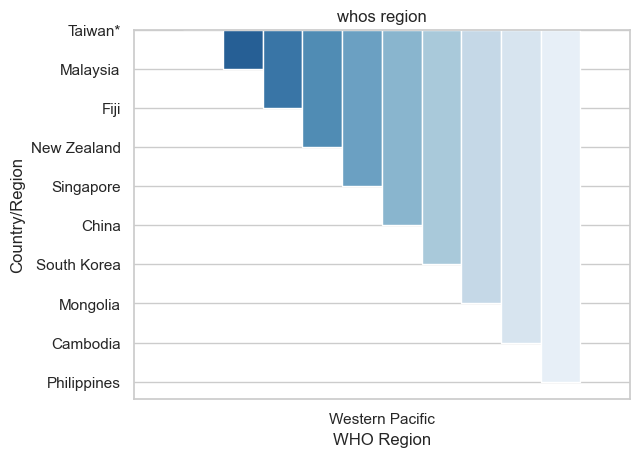

In [9]:
## Counties In whos region
region=data.sort_values('WHO Region',ascending=False).head(10)
sns.barplot(x='WHO Region',y='Country/Region',hue='Country/Region',data=region,palette='Blues_r',legend=False)
plt.xlabel('WHO Region')
plt.ylabel('Country/Region')
plt.title('whos region')
plt.show()

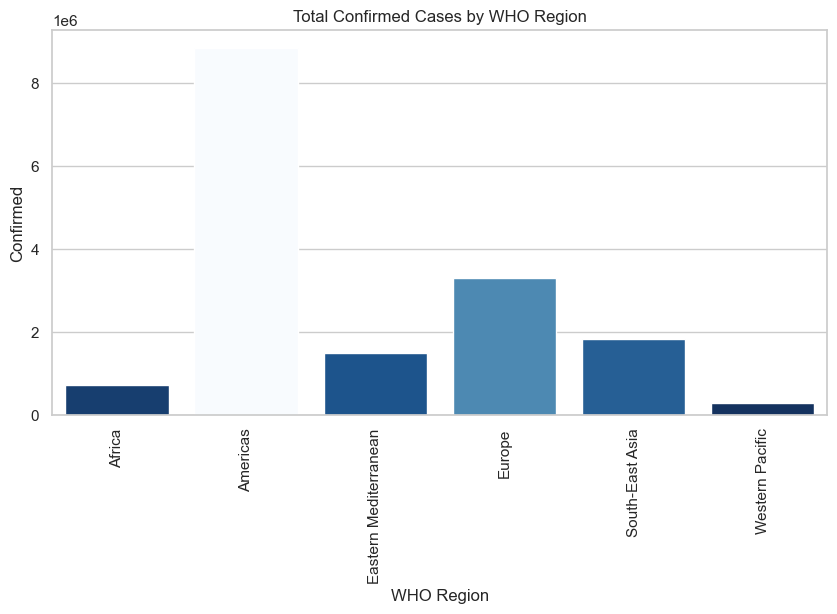

In [10]:
## WHOs Region by groupby.
region_cases = data.groupby("WHO Region")["Confirmed"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="WHO Region", y="Confirmed",hue='Confirmed', data=region_cases, palette="Blues_r",legend=False)
plt.title("Total Confirmed Cases by WHO Region")
plt.xticks(rotation=90)
plt.show()